In [239]:
%pylab inline
# https://mark-kramer.github.io/Case-Studies-Python/03.html#step-6-the-spectrogram
from matplotlib import cm # to get a matplotlib.colors.ListedColormap
from matplotlib import style

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat                    # To load .mat files
import scipy.stats as stats
import math
import pandas as pd

# ... and the tools that we will need for this notebook
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
plt.rcParams['figure.figsize']=(12,3)               # Change the default figure size

style.use('fivethirtyeight')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/sirap/opt/anaconda3/envs/mne/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['fft', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [240]:
# load EEG
# data_path = r'../plot-all-channels/data_chb01_03_all_channels2.npy'
# data_path = f'../plot-all-channels/data_chb04_08_all_channels2.npy'
data_path = r'../convert-all-channel-edf/'
data = np.load(data_path) 
seizure_info = { 'start': 6446, 'stop': 6557}
Fs = 256  
print('Seizure start: ', (seizure_info['start']), ' End at: ',(seizure_info['stop']))
print('Sampling rate is %d Hz'%Fs)

Seizure start:  6446  End at:  6557
Sampling rate is 256 Hz


In [241]:
# EEG = data[13] # All
# EEG = data[13][0 : 7500] # Before Seizre ( 7000 )
EEG = data[13][(seizure_info['start'] - 30) * Fs: seizure_info['start'] * Fs] # During Seizure Onset
# EEG = data[13][(seizure_info['start']) * Fs: (seizure_info['stop']) * Fs]  # During Seizure 
EEG.shape

(7680,)

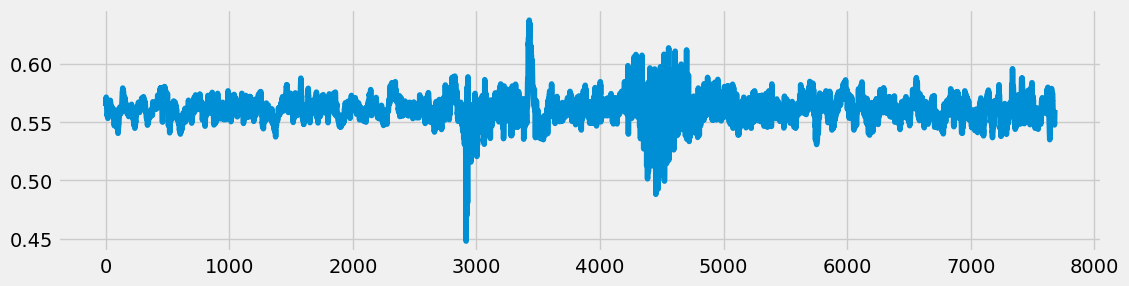

In [242]:
plt.plot(EEG)
plt.show()

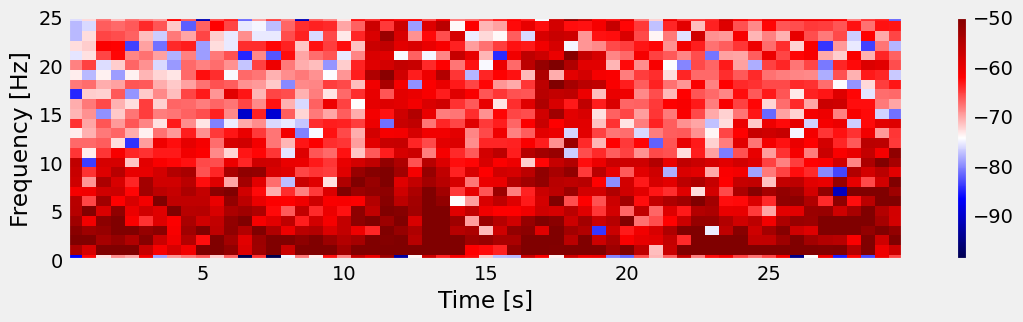

In [243]:
Fs = 256                  # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.5)  # ... and the overlap intervals

# Compute the spectrogram
f, t, Sxx = spectrogram(
    EEG,                    # Provide the signal,
    fs = Fs,                # ... the sampling frequency,
    nperseg = interval,     # ... the length of a segment,
    noverlap = overlap)     # ... the number of samples to overlap,
plt.ylim([0, 25])             # ... set the frequency range,
plt.pcolormesh(t, f, 10 * log10(Sxx), cmap='seismic')   # Plot the result
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.colorbar()                # ... with a color bar,
plt.clim([-50, -90])
plt.show()

In [244]:
EEG_zscore = np.zeros((Sxx.shape[0], Sxx.shape[1]))
for i in range(Sxx.shape[0]):
    EEG_zscore[i] = stats.zscore(Sxx[i][:])
print(f'Z-Score Pxx shape is {np.max(EEG_zscore)}')
EEG_zscore = EEG_zscore - np.mean(EEG)

Z-Score Pxx shape is 7.404992326528586


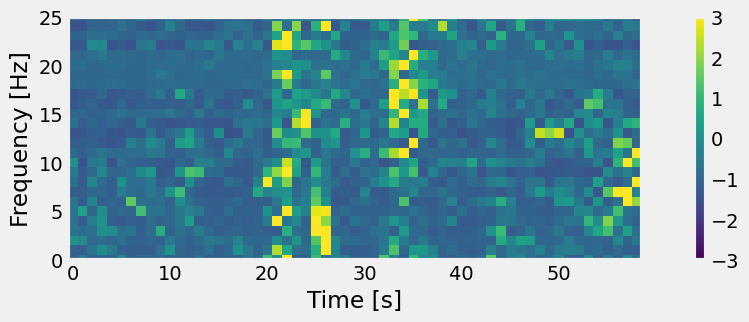

In [245]:
plt.imshow(EEG_zscore)
plt.ylim([0, 25])             # ... set the frequency range,
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.colorbar()                # ... with a color bar,
plt.clim([-3, 3])
plt.show()

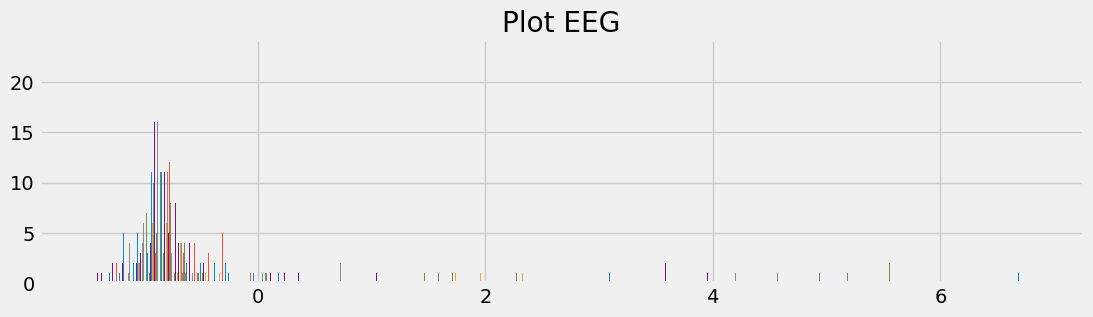

In [246]:
plt.hist(EEG_zscore, bins='auto')
plt.title('Plot EEG')
plt.show()